This was adapted from the pyCaret Multiclass Classification Tutorial.
https://github.com/pycaret/pycaret/blob/master/tutorials/Tutorial%20-%20Multiclass%20Classification.ipynb

I left in most of the help text/explanations.


In [1]:
# check installed version
import pycaret
pycaret.__version__

'3.1.0'

PyCaret’s Classification Module is a supervised machine learning module that is used for classifying elements into groups. The goal is to predict the categorical class labels which are discrete and unordered. 

Some common use cases include predicting customer default (Yes or No), predicting customer churn (customer will leave or stay), the disease found (positive or negative). 

This module can be used for binary or multiclass problems. It provides several pre-processing features that prepare the data for modeling through the setup function. It has over 18 ready-to-use algorithms and several plots to analyze the performance of trained models.

A typical workflow in PyCaret consist of following 5 steps in this order:

## **Setup** ➡️ **Compare Models** ➡️ **Analyze Model** ➡️ **Prediction** ➡️ **Save Model**

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("..\diabetes_cleaned.csv")

In [4]:
data.drop('Unnamed: 0', axis=1, inplace=True)

## Setup
This function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. It only has two required parameters i.e. `data` and `target`. All the other parameters are optional.

In [5]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(data, target = 'diabetes', session_id = 123)

,Description,Value
0,Session id,123
1,Target,diabetes
2,Target type,Multiclass
3,Original data shape,"(302953, 25)"
4,Transformed data shape,"(302953, 25)"
5,Transformed train set shape,"(212067, 25)"
6,Transformed test set shape,"(90886, 25)"
7,Numeric features,24
8,Preprocess,True
9,Imputation type,simple


Once the setup has been successfully executed it shows the information grid containing experiment level information. 

- **Session id:**  A pseudo-random number distributed as a seed in all functions for later reproducibility. If no `session_id` is passed, a random number is automatically generated that is distributed to all functions.<br/>
<br/>
- **Target type:**  Binary, Multiclass, or Regression. The Target type is automatically detected. <br/>
<br/>
- **Label Encoding:**  When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. In this tutorial, no label encoding is required since the target variable is of numeric type. <br/>
<br/>
- **Original data shape:**  Shape of the original data prior to any transformations. <br/>
<br/>
- **Transformed train set shape :**  Shape of transformed train set <br/>
<br/>
- **Transformed test set shape :**  Shape of transformed test set <br/>
<br/>
- **Numeric features :**  The number of features considered as numerical. <br/>
<br/>
- **Categorical features :**  The number of features considered as categorical. <br/>

PyCaret has two set of API's that you can work with. (1) Functional (as seen above) and (2) Object Oriented API.

With Object Oriented API instead of executing functions directly you will import a class and execute methods of class.

In [6]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [7]:
# check the type of exp
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [8]:
# init setup on exp
exp.setup(data, target = 'diabetes', session_id = 123)

,Description,Value
0,Session id,123
1,Target,diabetes
2,Target type,Multiclass
3,Original data shape,"(302953, 25)"
4,Transformed data shape,"(302953, 25)"
5,Transformed train set shape,"(212067, 25)"
6,Transformed test set shape,"(90886, 25)"
7,Numeric features,24
8,Preprocess,True
9,Imputation type,simple


You can use any of the two method i.e. Functional or OOP and even switch back and forth between two set of API's. The choice of method will not impact the results and has been tested for consistency.

## Compare Models

This function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [9]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8440,0.8098,0.8440,0.7915,0.7994,0.1599,0.2112,9.2790
lightgbm,Light Gradient Boosting Machine,0.8440,0.8096,0.8440,0.7913,0.7979,0.1514,0.2053,0.8170
ada,Ada Boost Classifier,0.8428,0.8038,0.8428,0.7905,0.8016,0.1748,0.2187,1.0420
ridge,Ridge Classifier,0.8421,0.0000,0.8421,0.7875,0.7776,0.0460,0.1105,0.0620
lr,Logistic Regression,0.8417,0.8017,0.8417,0.7871,0.7976,0.1535,0.1996,1.8520
qda,Quadratic Discriminant Analysis,0.8407,0.0000,0.8407,0.7067,0.7679,0.0000,0.0000,0.1320
dummy,Dummy Classifier,0.8407,0.5000,0.8407,0.7067,0.7679,0.0000,0.0000,0.0520
svm,SVM - Linear Kernel,0.8398,0.0000,0.8398,0.7126,0.7680,0.0010,0.0030,0.6130
lda,Linear Discriminant Analysis,0.8398,0.7988,0.8398,0.7877,0.8021,0.1836,0.2184,0.1780
rf,Random Forest Classifier,0.8302,0.7627,0.8302,0.7770,0.7942,0.1551,0.1789,2.3550


In [10]:
# compare models using OOP
exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8440,0.8098,0.8440,0.7915,0.7994,0.1599,0.2112,10.2880
lightgbm,Light Gradient Boosting Machine,0.8440,0.8096,0.8440,0.7913,0.7979,0.1514,0.2053,0.8750
ada,Ada Boost Classifier,0.8428,0.8038,0.8428,0.7905,0.8016,0.1748,0.2187,1.0740
ridge,Ridge Classifier,0.8421,0.0000,0.8421,0.7875,0.7776,0.0460,0.1105,0.0660
lr,Logistic Regression,0.8417,0.8017,0.8417,0.7871,0.7976,0.1535,0.1996,1.4240
qda,Quadratic Discriminant Analysis,0.8407,0.0000,0.8407,0.7067,0.7679,0.0000,0.0000,0.1330
dummy,Dummy Classifier,0.8407,0.5000,0.8407,0.7067,0.7679,0.0000,0.0000,0.0530
svm,SVM - Linear Kernel,0.8398,0.0000,0.8398,0.7126,0.7680,0.0010,0.0030,0.5760
lda,Linear Discriminant Analysis,0.8398,0.7988,0.8398,0.7877,0.8021,0.1836,0.2184,0.1850
rf,Random Forest Classifier,0.8302,0.7627,0.8302,0.7770,0.7942,0.1551,0.1789,2.4320


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Notice that the output between functional and OOP API is consistent. Rest of the functions in this notebook will only be shown using functional API only. 

## Analyze Model

You can use the `plot_model` function to analyzes the performance of a trained model on the test set. It may require re-training the model in certain cases.

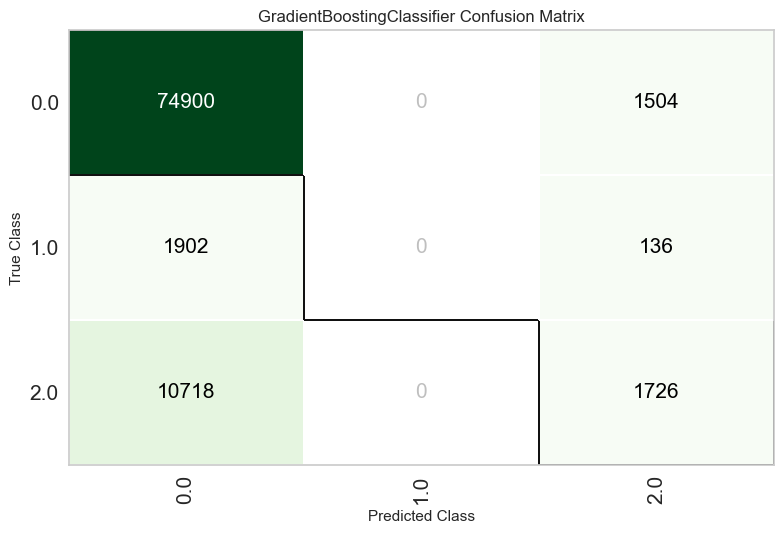

In [11]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

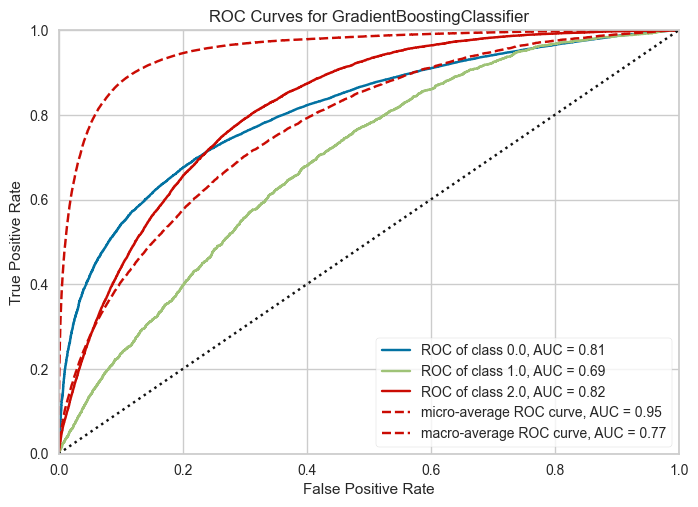

In [12]:
# plot AUC
plot_model(best, plot = 'auc')

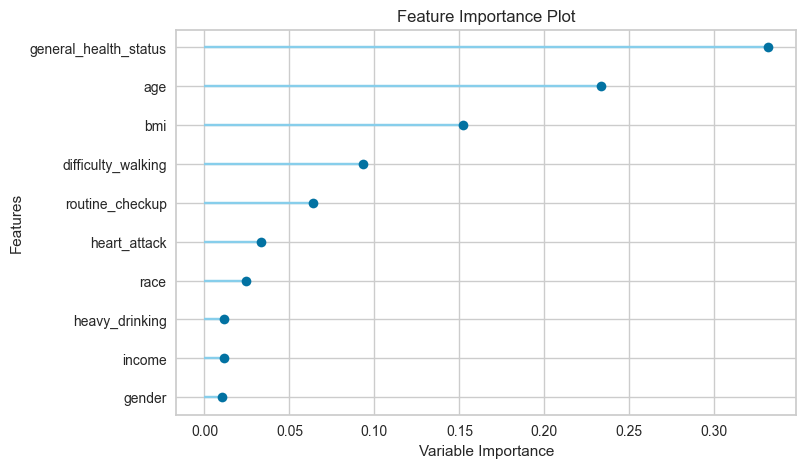

In [13]:
# plot feature importance
plot_model(best, plot = 'feature')

In [14]:
# check docstring to see available plots 
help(plot_model)

Help on function plot_model in module pycaret.classification.functional:

plot_model(estimator, plot: str = 'auc', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Union[dict, NoneType] = None, plot_kwargs: Union[dict, NoneType] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, display_format: Union[str, NoneType] = None) -> Union[str, NoneType]
    This function analyzes the performance of a trained model on holdout set.
    It may require re-training the model in certain cases.
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'auc')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'auc'
        List of available plots (ID - Name

An alternate to `plot_model` function is `evaluate_model`. It can only be used in Notebook since it uses ipywidget.

In [15]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Prediction
The `predict_model` function returns `prediction_label` and `prediction_score` (probability of the predicted class) as new columns in dataframe. When data is `None` (default), it uses the test set (created during the setup function) for scoring.

In [16]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8431,0,0.8431,0.7896,0.7981,0.1537,0.2039


In [17]:
# show predictions df
holdout_pred.head()

,bmi,smoker,stroke,heart_attack,angina_or_chd,chd_mi,asthma,physical_activity,heavy_drinking,no_doctor_due_to_cost,...,education,income,race,sleep_time,years_smoked,routine_checkup,heart_related,diabetes,prediction_label,prediction_score
20835,2.0,3.0,0.0,0.0,1,1,0.0,1.0,0.0,0.0,...,4.0,6.0,1.0,7.0,0.0,1.0,1,0.0,0,0.9357
109268,3.0,0.0,0.0,0.0,1,1,0.0,1.0,0.0,0.0,...,3.0,5.0,1.0,8.0,0.0,1.0,1,2.0,0,0.8301
270065,4.0,3.0,0.0,0.0,1,1,0.0,1.0,0.0,0.0,...,3.0,3.0,4.0,5.0,0.0,4.0,1,0.0,0,0.9697
9866,4.0,0.0,0.0,0.0,1,1,0.0,0.0,0.0,0.0,...,3.0,6.0,1.0,6.0,0.0,1.0,1,1.0,0,0.8140
46385,4.0,3.0,0.0,0.0,1,1,0.0,1.0,0.0,0.0,...,4.0,5.0,5.0,6.0,0.0,4.0,1,0.0,0,0.9324


The same function works for predicting the labels on unseen dataset. Let's create a copy of original data and drop the `Class variable`. We can then use the new data frame without labels for scoring.

In [18]:
# copy data and drop Class variable

new_data = data.copy()
new_data.drop('diabetes', axis=1, inplace=True)
new_data.head()

,bmi,smoker,stroke,heart_attack,angina_or_chd,chd_mi,asthma,physical_activity,heavy_drinking,no_doctor_due_to_cost,...,difficulty_walking,gender,age,education,income,race,sleep_time,years_smoked,routine_checkup,heart_related
0,3.0,0.0,0.0,0.0,1,1,0.0,0.0,0.0,0.0,...,0.0,0.0,7.0,2.0,3.0,1.0,6.0,0.0,0.0,1
1,3.0,0.0,0.0,0.0,1,1,0.0,1.0,0.0,0.0,...,0.0,0.0,4.0,4.0,6.0,1.0,5.0,0.0,1.0,1
2,2.0,0.0,0.0,0.0,1,1,0.0,1.0,0.0,0.0,...,0.0,0.0,3.0,3.0,3.0,1.0,9.0,0.0,1.0,1
3,2.0,3.0,0.0,0.0,1,1,0.0,1.0,0.0,0.0,...,0.0,0.0,7.0,4.0,5.0,2.0,7.0,0.0,1.0,1
4,3.0,0.0,0.0,0.0,1,1,0.0,0.0,0.0,0.0,...,0.0,0.0,7.0,2.0,5.0,1.0,8.0,0.0,1.0,1


In [19]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,bmi,smoker,stroke,heart_attack,angina_or_chd,chd_mi,asthma,physical_activity,heavy_drinking,no_doctor_due_to_cost,...,age,education,income,race,sleep_time,years_smoked,routine_checkup,heart_related,prediction_label,prediction_score
0,3.0,0.0,0.0,0.0,1,1,0.0,0.0,0.0,0.0,...,7.0,2.0,3.0,1.0,6.0,0.0,0.0,1,0,0.9358
1,3.0,0.0,0.0,0.0,1,1,0.0,1.0,0.0,0.0,...,4.0,4.0,6.0,1.0,5.0,0.0,1.0,1,0,0.9502
2,2.0,0.0,0.0,0.0,1,1,0.0,1.0,0.0,0.0,...,3.0,3.0,3.0,1.0,9.0,0.0,1.0,1,0,0.8875
3,2.0,3.0,0.0,0.0,1,1,0.0,1.0,0.0,0.0,...,7.0,4.0,5.0,2.0,7.0,0.0,1.0,1,0,0.8518
4,3.0,0.0,0.0,0.0,1,1,0.0,0.0,0.0,0.0,...,7.0,2.0,5.0,1.0,8.0,0.0,1.0,1,0,0.7758


## Save Model

Finally, you can save the entire pipeline on disk for later use, using pycaret's `save_model` function.

In [20]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['bmi', 'smoker', 'stroke',
                                              'heart_attack', 'angina_or_chd',
                                              'chd_mi', 'asthma',
                                              'physical_activity',
                                              'heavy_drinking',
                                              'no_doctor_due_to_cost',
                                              'any_healthcare_insurance',
                                              'general_health_status',
                                              'mental_health_status',
                                              'physical_health_status',
                                              'difficult...
                                             criterion='friedman_mse', init=None,
                     

In [21]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\djhar\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['bmi', 'smoker', 'stroke',
                                             'heart_attack', 'angina_or_chd',
                                             'chd_mi', 'asthma',
                                             'physical_activity',
                                             'heavy_drinking',
                                             'no_doctor_due_to_cost',
                                             'any_healthcare_insurance',
                                             'general_health_status',
                                             'mental_health_sta...
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='log_loss',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100,
                                            n_iter_no_change=None,
                                            random_state=123, subsample=1.0,
                                            tol=0.0001, validation_fraction=0.1,
                                            verbose=0, warm_start=False))],
         verbose=False)

In [22]:
# check all the available models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [23]:
# train logistic regression with default fold=10
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8414,0.8019,0.8414,0.7866,0.7981,0.1573,0.2016
1,0.8461,0.8045,0.8461,0.7964,0.8025,0.1734,0.2278
2,0.8413,0.8035,0.8413,0.7868,0.7980,0.1558,0.2001
3,0.8406,0.8051,0.8406,0.7844,0.7957,0.1440,0.1889
4,0.8411,0.7990,0.8411,0.7849,0.7962,0.1472,0.1929
5,0.8408,0.8008,0.8408,0.7861,0.7982,0.1580,0.2006
6,0.8407,0.7997,0.8407,0.7846,0.7963,0.1478,0.1922
7,0.8402,0.8002,0.8402,0.7835,0.7942,0.1357,0.1813
8,0.8421,0.8046,0.8421,0.7883,0.7990,0.1609,0.2062


The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [24]:
lr_results = pull()
print(type(lr_results))
lr_results

<class 'pandas.core.frame.DataFrame'>


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8414,0.8019,0.8414,0.7866,0.7981,0.1573,0.2016
1,0.8461,0.8045,0.8461,0.7964,0.8025,0.1734,0.2278
2,0.8413,0.8035,0.8413,0.7868,0.7980,0.1558,0.2001
3,0.8406,0.8051,0.8406,0.7844,0.7957,0.1440,0.1889
4,0.8411,0.7990,0.8411,0.7849,0.7962,0.1472,0.1929
5,0.8408,0.8008,0.8408,0.7861,0.7982,0.1580,0.2006
6,0.8407,0.7997,0.8407,0.7846,0.7963,0.1478,0.1922
7,0.8402,0.8002,0.8402,0.7835,0.7942,0.1357,0.1813
8,0.8421,0.8046,0.8421,0.7883,0.7990,0.1609,0.2062


In [25]:
# train logistic regression with fold=3
lr = create_model('lr', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8426,0.8039,0.8426,0.7888,0.7985,0.1569,0.2046
1,0.8406,0.8006,0.8406,0.7849,0.7969,0.1515,0.1950
2,0.8419,0.8007,0.8419,0.7874,0.7973,0.1508,0.1981
Mean,0.8417,0.8017,0.8417,0.7870,0.7976,0.1530,0.1992
Std,0.0008,0.0015,0.0008,0.0016,0.0007,0.0027,0.0040


In [26]:
# train logistic regression with specific model parameters
create_model('lr', C = 0.5, l1_ratio = 0.15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8414,0.8019,0.8414,0.7865,0.7980,0.1569,0.2012
1,0.8461,0.8045,0.8461,0.7963,0.8024,0.1730,0.2274
2,0.8413,0.8035,0.8413,0.7868,0.7980,0.1558,0.2001
3,0.8406,0.8051,0.8406,0.7845,0.7957,0.1441,0.1891
4,0.8410,0.7990,0.8410,0.7848,0.7962,0.1468,0.1925
5,0.8408,0.8008,0.8408,0.7861,0.7981,0.1579,0.2004
6,0.8406,0.7997,0.8406,0.7844,0.7961,0.1470,0.1913
7,0.8402,0.8002,0.8402,0.7835,0.7942,0.1357,0.1813
8,0.8421,0.8046,0.8421,0.7884,0.7991,0.1613,0.2067


LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.15, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
# train lr and return train score as well alongwith CV
create_model('lr', return_train_score=True)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Some other parameters that you might find very useful in `create_model` are:

- cross_validation
- engine
- fit_kwargs
- groups

You can check the docstring of the function for more info.

In [28]:
# help(create_model)

## ✅ Tune Model

This function tunes the hyperparameters of the model. The output of this function is a scoring grid with cross-validated scores by fold. The best model is selected based on the metric defined in optimize parameter. Metrics evaluated during cross-validation can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [29]:
# train a dt model with default params
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7692,0.5896,0.7692,0.7692,0.7692,0.1558,0.1558
1,0.7680,0.5945,0.7680,0.7715,0.7697,0.1638,0.1638
2,0.7677,0.5924,0.7677,0.7710,0.7694,0.1626,0.1626
3,0.7689,0.5913,0.7689,0.7715,0.7702,0.1641,0.1641
4,0.7687,0.5978,0.7687,0.7719,0.7703,0.1666,0.1666
5,0.7632,0.5829,0.7632,0.7658,0.7645,0.1445,0.1446
6,0.7669,0.5942,0.7669,0.7704,0.7687,0.1601,0.1601
7,0.7690,0.5993,0.7690,0.7724,0.7707,0.1665,0.1665
8,0.7687,0.5956,0.7687,0.7727,0.7707,0.1686,0.1686


In [30]:
# tune hyperparameters of dt
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8425,0.7880,0.8425,0.7885,0.7794,0.0542,0.1209
1,0.8429,0.7875,0.8429,0.7930,0.7783,0.0490,0.1201
2,0.8426,0.7846,0.8426,0.7897,0.7797,0.0557,0.1237
3,0.8429,0.7890,0.8429,0.7936,0.7787,0.0503,0.1212
4,0.8425,0.7836,0.8425,0.7916,0.7782,0.0478,0.1155
5,0.8409,0.7828,0.8409,0.7793,0.7775,0.0457,0.1013
6,0.8417,0.7823,0.8417,0.7825,0.7778,0.0475,0.1082
7,0.8406,0.7837,0.8406,0.7749,0.7756,0.0371,0.0885
8,0.8425,0.7914,0.8425,0.7882,0.7793,0.0540,0.1207


Fitting 10 folds for each of 10 candidates, totalling 100 fits


Metric to optimize can be defined in `optimize` parameter (default = 'Accuracy'). Also, a custom tuned grid can be passed with `custom_grid` parameter. 

In [31]:
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')

In [32]:
# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = F1
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8418,0.7978,0.8418,0.7868,0.7973,0.1515,0.1981
1,0.8446,0.7974,0.8446,0.7930,0.7999,0.1616,0.2146
2,0.8424,0.7960,0.8424,0.7889,0.7987,0.1581,0.2051
3,0.8414,0.7983,0.8414,0.7863,0.7977,0.1546,0.1995
4,0.8406,0.7932,0.8406,0.8061,0.7950,0.1406,0.1863
5,0.8404,0.7954,0.8404,0.7851,0.7980,0.1588,0.2001
6,0.8423,0.7939,0.8423,0.7879,0.7981,0.1558,0.2029
7,0.8413,0.7971,0.8413,0.7852,0.7961,0.1459,0.1925
8,0.8422,0.8014,0.8422,0.7889,0.8001,0.1675,0.2115


Fitting 10 folds for each of 7 candidates, totalling 70 fits


In [33]:
# to access the tuner object you can set return_tuner = True
tuned_dt, tuner = tune_model(dt, return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8425,0.7880,0.8425,0.7885,0.7794,0.0542,0.1209
1,0.8429,0.7875,0.8429,0.7930,0.7783,0.0490,0.1201
2,0.8426,0.7846,0.8426,0.7897,0.7797,0.0557,0.1237
3,0.8429,0.7890,0.8429,0.7936,0.7787,0.0503,0.1212
4,0.8425,0.7836,0.8425,0.7916,0.7782,0.0478,0.1155
5,0.8409,0.7828,0.8409,0.7793,0.7775,0.0457,0.1013
6,0.8417,0.7823,0.8417,0.7825,0.7778,0.0475,0.1082
7,0.8406,0.7837,0.8406,0.7749,0.7756,0.0371,0.0885
8,0.8425,0.7914,0.8425,0.7882,0.7793,0.0540,0.1207


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [34]:
# model object
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_samples_leaf=4,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')

In [35]:
# tuner object
tuner

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(exclude=None,
                                                                 include=['bmi',
                                                                          'smoker',
                                                                          'stroke',
                                                                          'heart_attack',
                                                                          'angina_or_chd',
                                                                          'chd_mi',
                                                                          'asthma',
                                                                          'physical_activity',
                                                                          'heavy_drinking',
                                                                          'no_doctor_due_to_cost',...
                                        'actual_estimator__max_features': [1.0,
                                                                           'sqrt',
                                                                           'log2'],
                                        'actual_estimator__min_impurity_decrease': [0,
                                                                                    0.0001,
                                                                                    0.001,
                                                                                    0.01,
                                                                                    0.0002,
                                                                                    0.002,
                                                                                    0.02,
                                                                                    0.0005,
                                                                                    0.005,
                                                                                    0.05,
                                                                                    0.1,
                                                                                    0.2,
                                                                                    0.3,
                                                                                    0.4,
                                                                                    0.5],
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_split': [2,
                                                                                5,
                                                                                7,
                                                                                9,
                                                                                10]},
                   pre_dispatch='2*n_jobs', random_state=123, refit=False,
                   return_train_score=False, scoring='accuracy', verbose=1)

The default search algorithm is `RandomizedSearchCV` from `sklearn`. This can be changed by using `search_library` and `search_algorithm` parameter.

In [36]:
# tune dt using optuna
tuned_dt = tune_model(dt, search_library = 'optuna')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8425,0.7961,0.8425,0.7885,0.7794,0.0542,0.1209
1,0.8429,0.7967,0.8429,0.7930,0.7783,0.0490,0.1201
2,0.8428,0.7930,0.8428,0.7896,0.7996,0.1632,0.2100
3,0.8415,0.7939,0.8415,0.7795,0.7772,0.0450,0.1042
4,0.8425,0.7918,0.8425,0.7912,0.7781,0.0477,0.1150
5,0.8411,0.7926,0.8411,0.7804,0.7782,0.0493,0.1065
6,0.8417,0.7906,0.8417,0.7847,0.7761,0.0386,0.0991
7,0.8406,0.7945,0.8406,0.7834,0.7951,0.1415,0.1870
8,0.8425,0.7995,0.8425,0.7884,0.7795,0.0552,0.1222


[I 2023-10-15 20:50:02,851] Searching the best hyperparameters using 212067 samples...
[I 2023-10-15 20:50:14,823] Finished hyperparameter search!


For more details on all available `search_library` and `search_algorithm` please check the docstring. Some other parameters that you might find very useful in `tune_model` are:

- choose_better
- n_iter
- early_stopping
- groups

You can check the docstring of the function for more info.

In [37]:
# help(tune_model)

## ✅ Ensemble Model

This function ensembles a given estimator. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [38]:
# ensemble with bagging
ensemble_model(dt, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8174,0.7216,0.8174,0.7749,0.7923,0.1740,0.1839
1,0.8134,0.7266,0.8134,0.7693,0.7875,0.1531,0.1621
2,0.8136,0.7200,0.8136,0.7724,0.7894,0.1644,0.1729
3,0.8161,0.7235,0.8161,0.7766,0.7928,0.1793,0.1881
4,0.8156,0.7169,0.8156,0.7720,0.7901,0.1650,0.1745
5,0.8119,0.7183,0.8119,0.7719,0.7884,0.1617,0.1695
6,0.8150,0.7230,0.8150,0.7712,0.7891,0.1595,0.1690
7,0.8176,0.7193,0.8176,0.7735,0.7909,0.1636,0.1745
8,0.8164,0.7244,0.8164,0.7753,0.7920,0.1730,0.1824


BaggingClassifier(base_estimator='deprecated', bootstrap=True,
                  bootstrap_features=False,
                  estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   random_state=123,
                                                   splitter='best'),
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=123, verbose=0,
                  warm_start=False)

In [39]:
# ensemble with boosting
ensemble_model(dt, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7824,0.6415,0.7824,0.7708,0.7763,0.1630,0.1635
1,0.7833,0.6400,0.7833,0.7725,0.7777,0.1703,0.1707
2,0.7809,0.6381,0.7809,0.7731,0.7769,0.1720,0.1722
3,0.7823,0.6437,0.7823,0.7743,0.7781,0.1759,0.1761
4,0.7811,0.6299,0.7811,0.7709,0.7758,0.1646,0.1650
5,0.7791,0.6372,0.7791,0.7679,0.7733,0.1533,0.1537
6,0.7821,0.6289,0.7821,0.7725,0.7770,0.1687,0.1690
7,0.7838,0.6414,0.7838,0.7717,0.7774,0.1653,0.1659
8,0.7818,0.6471,0.7818,0.7720,0.7767,0.1687,0.1690


AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    random_state=123,
                                                    splitter='best'),
                   learning_rate=1.0, n_estimators=10, random_state=123)

Some other parameters that you might find very useful in `ensemble_model` are:

- choose_better
- n_estimators
- groups
- fit_kwargs
- probability_threshold
- return_train_score

You can check the docstring of the function for more info.

In [40]:
# help(ensemble_model)

## ✅ Blend Models

In [41]:
best_recall_models_top3 = compare_models(sort = 'Recall', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8440,0.8098,0.8440,0.7915,0.7994,0.1599,0.2112,10.3720
lightgbm,Light Gradient Boosting Machine,0.8440,0.8096,0.8440,0.7913,0.7979,0.1514,0.2053,0.6920
ada,Ada Boost Classifier,0.8428,0.8038,0.8428,0.7905,0.8016,0.1748,0.2187,1.0950
ridge,Ridge Classifier,0.8421,0.0000,0.8421,0.7875,0.7776,0.0460,0.1105,0.0630
lr,Logistic Regression,0.8417,0.8017,0.8417,0.7871,0.7976,0.1535,0.1996,1.4060
qda,Quadratic Discriminant Analysis,0.8407,0.0000,0.8407,0.7067,0.7679,0.0000,0.0000,0.1340
dummy,Dummy Classifier,0.8407,0.5000,0.8407,0.7067,0.7679,0.0000,0.0000,0.0540
svm,SVM - Linear Kernel,0.8398,0.0000,0.8398,0.7126,0.7680,0.0010,0.0030,0.5420
lda,Linear Discriminant Analysis,0.8398,0.7988,0.8398,0.7877,0.8021,0.1836,0.2184,0.1910
rf,Random Forest Classifier,0.8302,0.7627,0.8302,0.7770,0.7942,0.1551,0.1789,2.5260


In [42]:
# blend top 3 models
blend_models(best_recall_models_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8429,0.8112,0.8429,0.7882,0.7967,0.1468,0.1980
1,0.8470,0.8124,0.8470,0.7987,0.8007,0.1617,0.2233
2,0.8442,0.8104,0.8442,0.7921,0.8000,0.1629,0.2142
3,0.8438,0.8138,0.8438,0.7908,0.7989,0.1574,0.2089
4,0.8422,0.8077,0.8422,0.7865,0.7956,0.1414,0.1916
5,0.8433,0.8083,0.8433,0.7902,0.7993,0.1605,0.2094
6,0.8441,0.8092,0.8441,0.7911,0.7985,0.1549,0.2080
7,0.8433,0.8090,0.8433,0.7896,0.7970,0.1471,0.1996
8,0.8443,0.8145,0.8443,0.7925,0.7996,0.1596,0.2121


VotingClassifier(estimators=[('Gradient Boosting Classifier',
                              GradientBoostingClassifier(ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.1,
                                                         loss='log_loss',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=100,
                                                         n_iter_no_change=Non...
                                             num_leaves=31, objective=None,
                                             random_state=123, reg_alpha=0.0,
                                             reg_lambda=0.0, subsample=1.0,
                                             subsample_for_bin=200000,
                                             subsample_freq=0)),
                             ('Ada Boost Classifier',
                              AdaBoostClassifier(algorithm='SAMME.R',
                                                 base_estimator='deprecated',
                                                 estimator=None,
                                                 learning_rate=1.0,
                                                 n_estimators=50,
                                                 random_state=123))],
                 flatten_transform=True, n_jobs=-1, verbose=False,
                 voting='soft', weights=None)

Some other parameters that you might find very useful in `blend_models` are:

- choose_better
- method
- weights
- fit_kwargs
- probability_threshold
- return_train_score

You can check the docstring of the function for more info.

In [43]:
# help(blend_models)

## ✅ Stack Models

This function trains a meta-model over select estimators passed in the estimator_list parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [44]:
# stack models
stack_models(best_recall_models_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8430,0.8087,0.8430,0.7911,0.8024,0.1794,0.2225
1,0.8464,0.8101,0.8464,0.7976,0.8052,0.1886,0.2387
2,0.8421,0.8080,0.8421,0.7902,0.8025,0.1811,0.2216
3,0.8426,0.8105,0.8426,0.7898,0.8010,0.1715,0.2155
4,0.8427,0.8046,0.8427,0.7897,0.8007,0.1700,0.2148
5,0.8410,0.8064,0.8410,0.7883,0.8011,0.1745,0.2140
6,0.8426,0.8058,0.8426,0.7894,0.8011,0.1731,0.2167
7,0.8424,0.8065,0.8424,0.7892,0.7996,0.1637,0.2093
8,0.8431,0.8106,0.8431,0.7917,0.8028,0.1809,0.2240


StackingClassifier(cv=5,
                   estimators=[('Gradient Boosting Classifier',
                                GradientBoostingClassifier(ccp_alpha=0.0,
                                                           criterion='friedman_mse',
                                                           init=None,
                                                           learning_rate=0.1,
                                                           loss='log_loss',
                                                           max_depth=3,
                                                           max_features=None,
                                                           max_leaf_nodes=None,
                                                           min_impurity_decrease=0.0,
                                                           min_samples_leaf=1,
                                                           min_samples_split=2,
                                                           min_weight_fraction_leaf=0.0,
                                                           n_estimators=100,
                                                           n_iter_no_cha...
                                                   learning_rate=1.0,
                                                   n_estimators=50,
                                                   random_state=123))],
                   final_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                      dual=False,
                                                      fit_intercept=True,
                                                      intercept_scaling=1,
                                                      l1_ratio=None,
                                                      max_iter=1000,
                                                      multi_class='auto',
                                                      n_jobs=None, penalty='l2',
                                                      random_state=123,
                                                      solver='lbfgs',
                                                      tol=0.0001, verbose=0,
                                                      warm_start=False),
                   n_jobs=-1, passthrough=True, stack_method='auto', verbose=0)

Some other parameters that you might find very useful in `stack_models` are:

- choose_better
- meta_model
- method
- restack
- probability_threshold
- return_train_score

You can check the docstring of the function for more info.

In [45]:
# help(stack_models)

## ✅ Plot Model

This function analyzes the performance of a trained model on the hold-out set. It may require re-training the model in certain cases.

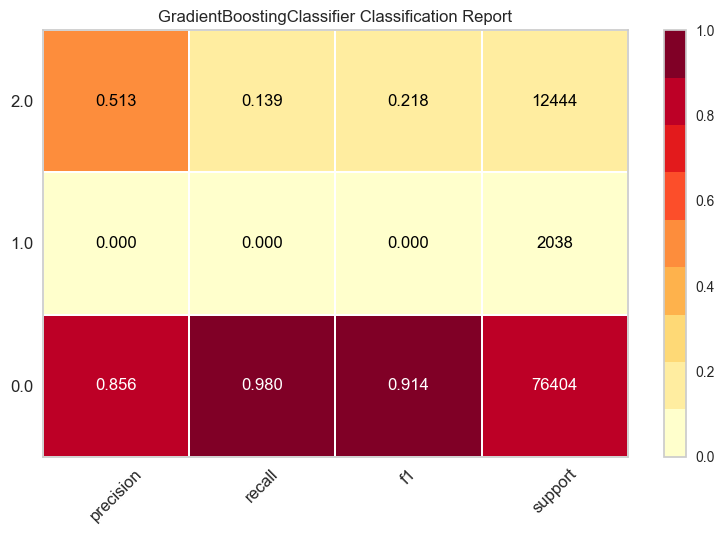

In [46]:
# plot class report
plot_model(best, plot = 'class_report')

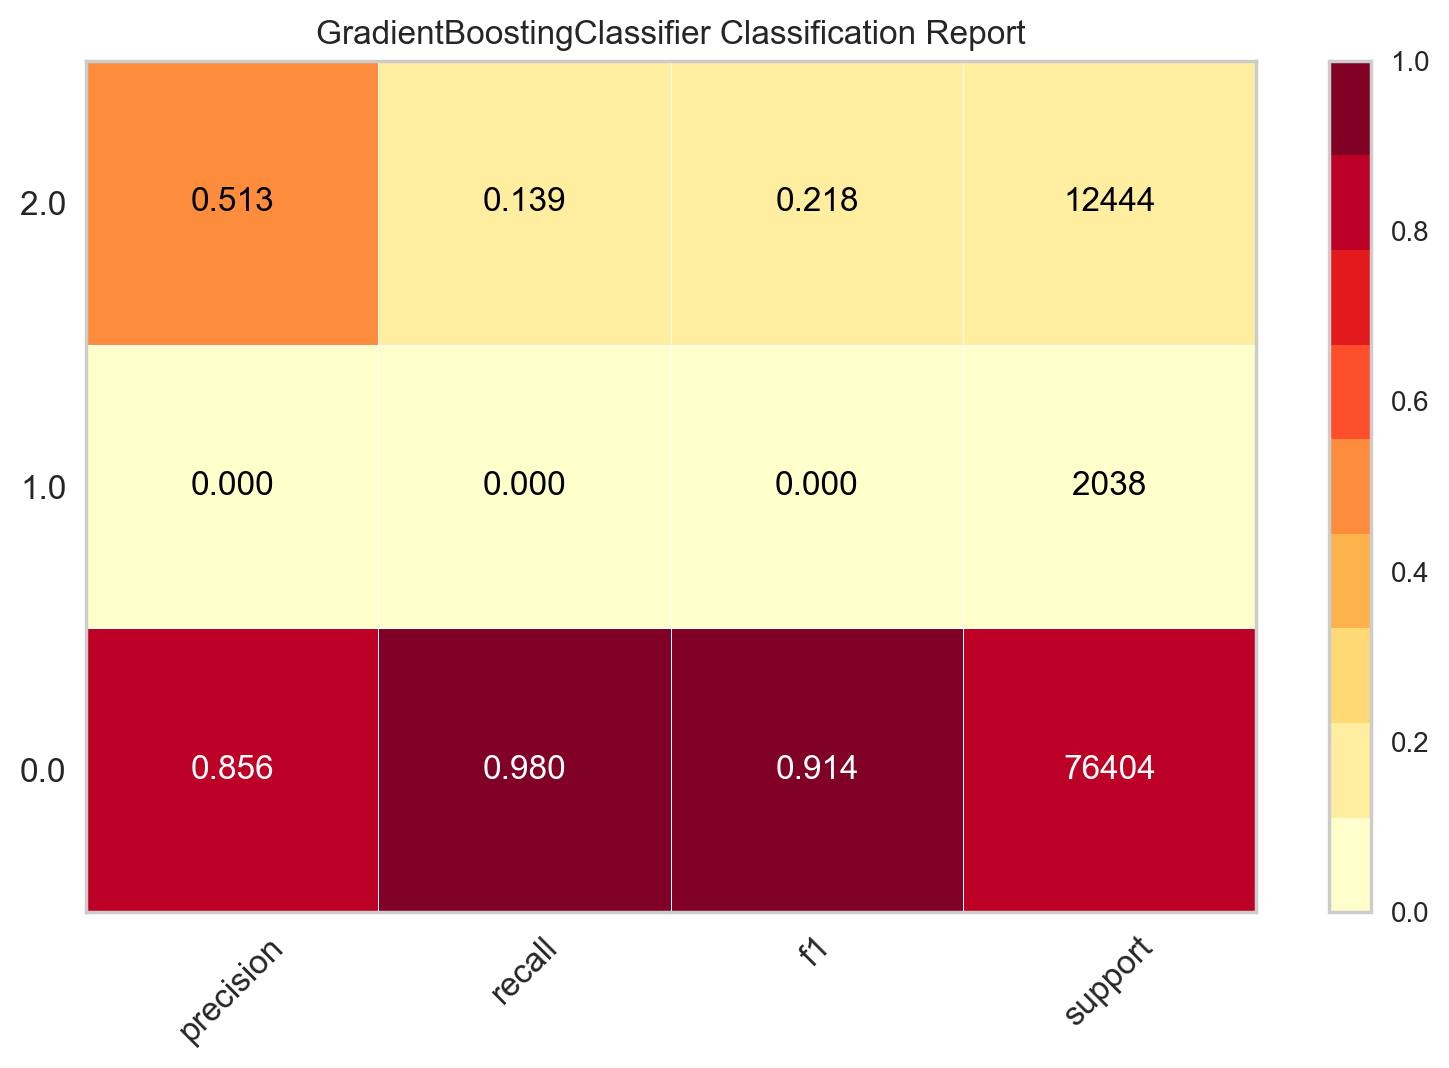

In [47]:
# to control the scale of plot
plot_model(best, plot = 'class_report', scale = 2)

In [48]:
# to save the plot
plot_model(best, plot = 'class_report', save=True)

'Class Report.png'

Some other parameters that you might find very useful in `plot_model` are:

- fit_kwargs
- plot_kwargs
- groups
- display_format

You can check the docstring of the function for more info.

In [49]:
# help(plot_model)

## ✅ Interpret Model

This function analyzes the predictions generated from a trained model. Most plots in this function are implemented based on the SHAP (Shapley Additive exPlanations). For more info on this, please see https://shap.readthedocs.io/en/latest/

In [50]:
# train lightgbm model
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8435,0.8109,0.8435,0.7899,0.7971,0.1475,0.2007
1,0.8475,0.8115,0.8475,0.8004,0.8006,0.1600,0.2244
2,0.8438,0.8097,0.8438,0.7908,0.7989,0.1575,0.2088
3,0.8440,0.8130,0.8440,0.7911,0.7981,0.1523,0.2056
4,0.8419,0.8065,0.8419,0.7855,0.7941,0.1336,0.1847
5,0.8427,0.8077,0.8427,0.7890,0.7983,0.1555,0.2041
6,0.8438,0.8090,0.8438,0.7901,0.7979,0.1523,0.2050
7,0.8437,0.8083,0.8437,0.7904,0.7970,0.1466,0.2005
8,0.8442,0.8136,0.8442,0.7922,0.7991,0.1569,0.2097


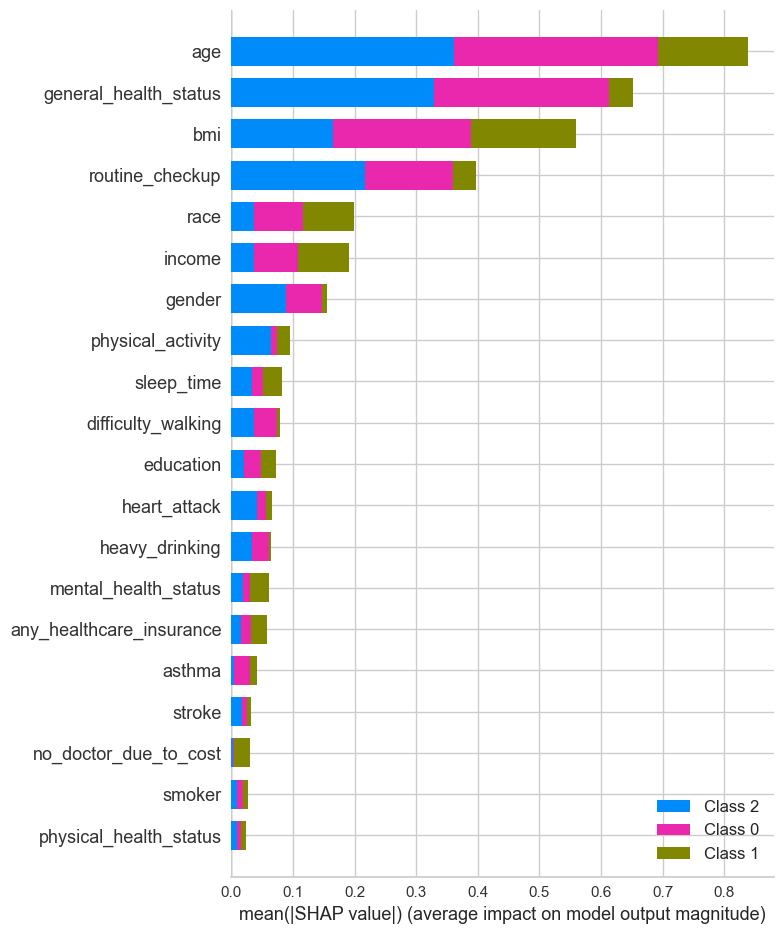

In [51]:
# interpret summary model
interpret_model(lightgbm, plot = 'summary')

In [52]:
# reason plot for test set observation 1
interpret_model(lightgbm, plot = 'reason', observation = 1)

Some other parameters that you might find very useful in `interpret_model` are:

- plot
- feature
- use_train_data
- X_new_sample
- y_new_sample
- save

You can check the docstring of the function for more info.

In [ ]:
# help(interpret_model)

## ✅ Get Leaderboard

This function returns the leaderboard of all models trained in the current setup.

In [53]:
# get leaderboard
lb = get_leaderboard()
lb

,Model Name,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Index,,,,,,,,,
0,Logistic Regression,"(TransformerWrapper(exclude=None,\n ...",0.8417,0.8017,0.8417,0.7871,0.7976,0.1535,0.1996
1,K Neighbors Classifier,"(TransformerWrapper(exclude=None,\n ...",0.8276,0.7017,0.8276,0.7743,0.7930,0.1548,0.1751
2,Naive Bayes,"(TransformerWrapper(exclude=None,\n ...",0.7716,0.7689,0.7716,0.7980,0.7818,0.2628,0.2675
3,Decision Tree Classifier,"(TransformerWrapper(exclude=None,\n ...",0.7677,0.5926,0.7677,0.7705,0.7691,0.1606,0.1606
4,SVM - Linear Kernel,"(TransformerWrapper(exclude=None,\n ...",0.8398,0.0000,0.8398,0.7126,0.7680,0.0010,0.0030
5,Ridge Classifier,"(TransformerWrapper(exclude=None,\n ...",0.8421,0.0000,0.8421,0.7875,0.7776,0.0460,0.1105
6,Random Forest Classifier,"(TransformerWrapper(exclude=None,\n ...",0.8302,0.7627,0.8302,0.7770,0.7942,0.1551,0.1789
7,Quadratic Discriminant Analysis,"(TransformerWrapper(exclude=None,\n ...",0.8407,0.0000,0.8407,0.7067,0.7679,0.0000,0.0000
8,Ada Boost Classifier,"(TransformerWrapper(exclude=None,\n ...",0.8428,0.8038,0.8428,0.7905,0.8016,0.1748,0.2187


In [54]:
# select the best model based on F1
lb.sort_values(by='F1', ascending=False)['Model'].iloc[0]

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['bmi', 'smoker', 'stroke',
                                             'heart_attack', 'angina_or_chd',
                                             'chd_mi', 'asthma',
                                             'physical_activity',
                                             'heavy_drinking',
                                             'no_doctor_due_to_cost',
                                             'any_healthcare_insurance',
                                             'general_health_status',
                                             'mental_health_status',
                                             'physical_health_status',
                                             'difficult...
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent',
                                                              verbose='deprecated'))),
                ['trained_model',
                 LinearDiscriminantAnalysis(covariance_estimator=None,
                                            n_components=None, priors=None,
                                            shrinkage=None, solver='svd',
                                            store_covariance=False,
                                            tol=0.0001)]],
         verbose=False)

Some other parameters that you might find very useful in `get_leaderboard` are:

- finalize_models
- fit_kwargs
- model_only
- groups

You can check the docstring of the function for more info.

In [ ]:
# help(get_leaderboard)

## ✅ AutoML
This function returns the best model out of all trained models in the current setup based on the optimize parameter. Metrics evaluated can be accessed using the `get_metrics` function.

In [55]:
automl()

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

## ✅ Dashboard
The dashboard function generates the interactive dashboard for a trained model. The dashboard is implemented using `ExplainerDashboard`. For more information check out [Explainer Dashboard.](explainerdashboard.readthedocs.io)

In [ ]:
# dashboard function
dashboard(dt, display_format ='inline')

## ✅Create App
This function creates a basic gradio app for inference.

In [ ]:
# create gradio app
create_app(best)

## ✅ Create API
This function takes an input model and creates a POST API for inference.

In [ ]:
# create api
create_api(best, api_name = 'my_first_api')

In [ ]:
# !python my_first_api.py

In [ ]:
# check out the .py file created with this magic command
# %load my_first_api.py

## ✅ Create Docker
This function creates a `Dockerfile` and `requirements.txt` for productionalizing API end-point.

In [ ]:
create_docker('my_first_api')

In [ ]:
# check out the DockerFile file created with this magic command
# %load DockerFile

In [ ]:
# check out the requirements file created with this magic command
# %load requirements.txt

## ✅ Finalize Model
This function trains a given model on the entire dataset including the hold-out set.

In [ ]:
final_best = finalize_model(best)

In [ ]:
final_best

## ✅ Convert Model
This function transpiles the trained machine learning model's decision function in different programming languages such as Python, C, Java, Go, C#, etc. It is very useful if you want to deploy models into environments where you can't install your normal Python stack to support model inference.

In [ ]:
# transpiles learned function to java
print(convert_model(dt, language = 'java'))

## ✅ Deploy Model
This function deploys the entire ML pipeline on the cloud.

**AWS:**  When deploying model on AWS S3, environment variables must be configured using the command-line interface. To configure AWS environment variables, type `aws configure` in terminal. The following information is required which can be generated using the Identity and Access Management (IAM) portal of your amazon console account:

- AWS Access Key ID
- AWS Secret Key Access
- Default Region Name (can be seen under Global settings on your AWS console)
- Default output format (must be left blank)

**GCP:** To deploy a model on Google Cloud Platform ('gcp'), the project must be created using the command-line or GCP console. Once the project is created, you must create a service account and download the service account key as a JSON file to set environment variables in your local environment. Learn more about it: https://cloud.google.com/docs/authentication/production

**Azure:** To deploy a model on Microsoft Azure ('azure'), environment variables for the connection string must be set in your local environment. Go to settings of storage account on Azure portal to access the connection string required.
AZURE_STORAGE_CONNECTION_STRING (required as environment variable)
Learn more about it: https://docs.microsoft.com/en-us/azure/storage/blobs/storage-quickstart-blobs-python?toc=%2Fpython%2Fazure%2FTOC.json

In [ ]:
# deploy model on aws s3
# deploy_model(best, model_name = 'my_first_platform_on_aws',
#             platform = 'aws', authentication = {'bucket' : 'pycaret-test'})

In [ ]:
# load model from aws s3
# loaded_from_aws = load_model(model_name = 'my_first_platform_on_aws', platform = 'aws',
#                              authentication = {'bucket' : 'pycaret-test'})

# loaded_from_aws

## ✅ Save / Load Model
This function saves the transformation pipeline and a trained model object into the current working directory as a pickle file for later use.

In [ ]:
# save model
save_model(best, 'my_first_model')

In [ ]:
# load model
loaded_from_disk = load_model('my_first_model')
loaded_from_disk

## ✅ Save / Load Experiment
This function saves all the experiment variables on disk, allowing to later resume without rerunning the setup function.

In [ ]:
# save experiment
save_experiment('my_experiment')

In [ ]:
# load experiment from disk
exp_from_disk = load_experiment('my_experiment', data=data)